DL LAB EXP-1

In [1]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def single_neuron(inputs, weights, bias):
    # Calculate the weighted sum
    weighted_sum = np.dot(inputs, weights) + bias
    # Apply the activation function
    output = sigmoid(weighted_sum)
    return output

inputs = np.array([1, 0, 1])

weights = np.array([0.5, -0.6, 0.2])

# Bias
bias = 0.1

# Performing binary classification
output = single_neuron(inputs, weights, bias)

# Displaying the result
print(f"Inputs: {inputs}")
print(f"Weights: {weights}")
print(f"Bias: {bias}")
print(f"Neuron Output (after activation): {output:.4f}")

# Binary classification based on a threshold
threshold = 0.5
classification = 1 if output >= threshold else 0
print(f"Binary Classification: {classification}")

Inputs: [1 0 1]
Weights: [ 0.5 -0.6  0.2]
Bias: 0.1
Neuron Output (after activation): 0.6900
Binary Classification: 1


DL LAB EXP-2

In [2]:
# Importing necessary libraries
import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0

class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.zeros(input_size)  # Initialize weights to zero
        self.bias = 0                        # Initialize bias to zero
        self.learning_rate = learning_rate   # Set the learning rate

    def predict(self, inputs):
        # Calculate the weighted sum
        linear_output = np.dot(inputs, self.weights) + self.bias
        return step_function(linear_output)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            print(f"Epoch {epoch + 1}/{epochs}")
            for i in range(len(X)):
                # Make a prediction
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
                print(f"Sample: {X[i]}, Target: {y[i]}, Prediction: {prediction}, Weights: {self.weights}, Bias: {self.bias}")
            print("-" * 50)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 0, 0, 1])  # AND gate outputs

slp = SingleLayerPerceptron(input_size=2)

slp.train(X, y, epochs=10)

print("\nTesting the Perceptron:")
for i in range(len(X)):
    prediction = slp.predict(X[i])
    print(f"Input: {X[i]}, Predicted Output: {prediction}, Target: {y[i]}")

Epoch 1/10
Sample: [0 0], Target: 0, Prediction: 1, Weights: [0. 0.], Bias: -0.1
Sample: [0 1], Target: 0, Prediction: 0, Weights: [0. 0.], Bias: -0.1
Sample: [1 0], Target: 0, Prediction: 0, Weights: [0. 0.], Bias: -0.1
Sample: [1 1], Target: 1, Prediction: 0, Weights: [0.1 0.1], Bias: 0.0
--------------------------------------------------
Epoch 2/10
Sample: [0 0], Target: 0, Prediction: 1, Weights: [0.1 0.1], Bias: -0.1
Sample: [0 1], Target: 0, Prediction: 1, Weights: [0.1 0. ], Bias: -0.2
Sample: [1 0], Target: 0, Prediction: 0, Weights: [0.1 0. ], Bias: -0.2
Sample: [1 1], Target: 1, Prediction: 0, Weights: [0.2 0.1], Bias: -0.1
--------------------------------------------------
Epoch 3/10
Sample: [0 0], Target: 0, Prediction: 0, Weights: [0.2 0.1], Bias: -0.1
Sample: [0 1], Target: 0, Prediction: 1, Weights: [0.2 0. ], Bias: -0.2
Sample: [1 0], Target: 0, Prediction: 1, Weights: [0.1 0. ], Bias: -0.30000000000000004
Sample: [1 1], Target: 1, Prediction: 0, Weights: [0.2 0.1], Bia

DL LAB EXP-3

In [3]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.weights_input_hidden = np.random.uniform(-0.5, 0.5, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-0.5, 0.5, hidden_size)
        self.weights_hidden_output = np.random.uniform(-0.5, 0.5, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-0.5, 0.5, output_size)
        self.learning_rate = learning_rate

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, targets):
        output_error = targets - self.output
        output_delta = output_error * sigmoid_derivative(self.output_layer_input)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_input)

        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_layer_output.T, output_delta)
        self.bias_output += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights_input_hidden += self.learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden += self.learning_rate * np.sum(hidden_delta, axis=0)

    def train(self, inputs, targets, epochs=10000):
        for epoch in range(epochs):
            self.forward(inputs)
            self.backward(inputs, targets)

            if (epoch + 1) % 1000 == 0:
                loss = np.mean((targets - self.output) ** 2)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, inputs):
        predictions = self.forward(inputs)
        return np.round(predictions)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
mlp.train(X, y, epochs=10000)

print("\nTesting the MLP on XOR Gate:")
for i in range(len(X)):
    prediction = mlp.predict(X[i].reshape(1, -1))
    print(f"Input: {X[i]}, Predicted Output: {int(prediction.item())}, Target: {y[i][0]}")

Epoch 1000/10000, Loss: 0.2496
Epoch 2000/10000, Loss: 0.2484
Epoch 3000/10000, Loss: 0.2363
Epoch 4000/10000, Loss: 0.1087
Epoch 5000/10000, Loss: 0.0238
Epoch 6000/10000, Loss: 0.0106
Epoch 7000/10000, Loss: 0.0065
Epoch 8000/10000, Loss: 0.0046
Epoch 9000/10000, Loss: 0.0035
Epoch 10000/10000, Loss: 0.0028

Testing the MLP on XOR Gate:
Input: [0 0], Predicted Output: 0, Target: 0
Input: [0 1], Predicted Output: 1, Target: 1
Input: [1 0], Predicted Output: 1, Target: 1
Input: [1 1], Predicted Output: 0, Target: 0


DL LAB EXP-4

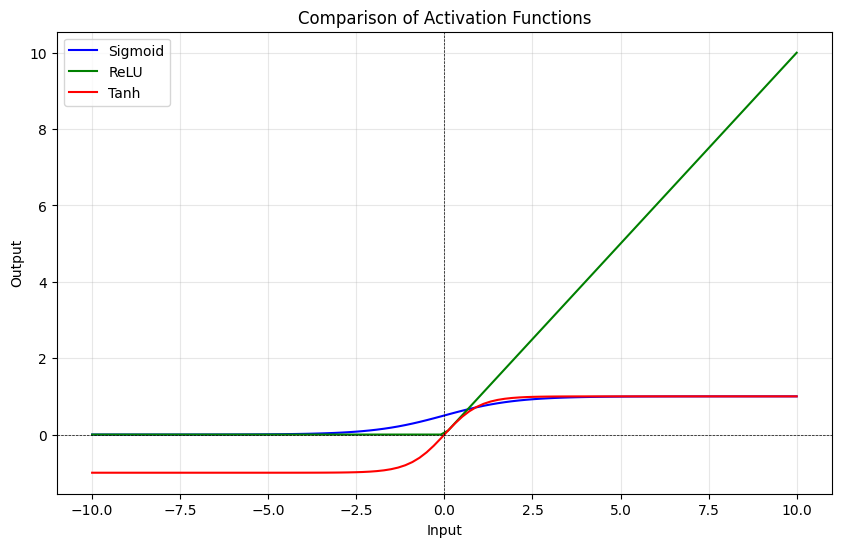

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-10, 10, 100)

sigmoid_output = sigmoid(x)
relu_output = relu(x)
tanh_output = tanh(x)

plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid_output, label="Sigmoid", color="blue")
# ReLU
plt.plot(x, relu_output, label="ReLU", color="green")
# Tanh
plt.plot(x, tanh_output, label="Tanh", color="red")

plt.title("Comparison of Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

DL LAB EXP-5

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class TwoLayerNN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights and biases with small random values
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.random.uniform(-1, 1, hidden_size)
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.random.uniform(-1, 1, output_size)
        self.learning_rate = learning_rate

    def forward_propagation(self, inputs):
        # Calculate hidden layer activations
        self.hidden_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)

        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)

        return self.final_output

    def back_propagation(self, inputs, targets):
        # Calculate output layer error
        output_error = targets - self.final_output
        output_delta = output_error * sigmoid_derivative(self.final_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output += self.learning_rate * np.sum(output_delta, axis=0)
        self.weights_input_hidden += self.learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden += self.learning_rate * np.sum(hidden_delta, axis=0)

    def train(self, inputs, targets, epochs=10000):
        for epoch in range(epochs):
            # Forward and backward pass
            self.forward_propagation(inputs)
            self.back_propagation(inputs, targets)

            # Print loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                loss = np.mean((targets - self.final_output) ** 2)
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, inputs):
        # Perform forward pass for prediction
        return self.forward_propagation(inputs)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = TwoLayerNN(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
nn.train(X, y, epochs=10000)

print("\nTesting the Neural Network on XOR Gate:")
for i in range(len(X)):
    prediction = nn.predict(X[i].reshape(1, -1))
    print(f"Input: {X[i]}, Predicted Output: {np.round(prediction[0][0])}, Target: {y[i][0]}")

Epoch 1000/10000, Loss: 0.2499
Epoch 2000/10000, Loss: 0.2498
Epoch 3000/10000, Loss: 0.2496
Epoch 4000/10000, Loss: 0.2488
Epoch 5000/10000, Loss: 0.2429
Epoch 6000/10000, Loss: 0.1635
Epoch 7000/10000, Loss: 0.0404
Epoch 8000/10000, Loss: 0.0152
Epoch 9000/10000, Loss: 0.0085
Epoch 10000/10000, Loss: 0.0057

Testing the Neural Network on XOR Gate:
Input: [0 0], Predicted Output: 0.0, Target: 0
Input: [0 1], Predicted Output: 1.0, Target: 1
Input: [1 0], Predicted Output: 1.0, Target: 1
Input: [1 1], Predicted Output: 0.0, Target: 0
